# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data (don't run this part again)

In [ ]:
data1 = pd.read_excel('./hotel_revenue_historical_full.xlsx', sheet_name='2018')
data1.head()

In [ ]:
data2 = pd.read_excel('./hotel_revenue_historical_full.xlsx', sheet_name='2019')
data2.head()

In [ ]:
data3 = pd.read_excel('./hotel_revenue_historical_full.xlsx', sheet_name='2020')
data3.head()

In [ ]:
data4 = pd.read_excel('./hotel_revenue_historical_full.xlsx', sheet_name='meal_cost')
data4.head()

In [ ]:
data5 = pd.read_excel('./hotel_revenue_historical_full.xlsx', sheet_name='market_segment')
data5.head(8)

In [ ]:
data6 = pd.read_excel('./country.xlsx')
data6.head()

In [ ]:
data1.to_csv('HRH2018.csv', index=False)

In [ ]:
data2.to_csv('HRH2019.csv', index=False)

In [ ]:
data3.to_csv('HRH2020.csv', index=False)

In [ ]:
data4.to_csv('meal_cost.csv', index=False)

In [ ]:
data5.to_csv('market_segment.csv', index=False)

In [ ]:
data6.to_csv('country.csv', index=False)

In [ ]:
d1 = pd.read_csv('./data/HRH2018.csv')
#d1.info()

In [ ]:
d2 = pd.read_csv('./data/HRH2019.csv')
#d2.info()

In [ ]:
d3 = pd.read_csv('./data/HRH2020.csv')
#d3.info()

In [ ]:
d = [d1, d2, d3]
res = pd.concat(d)

In [ ]:
print(res.shape)

In [ ]:
res.to_csv('./data/hotel_revenue.csv', index=False)

# Data Processing

In [2]:
data = pd.read_csv('./data/hotel_revenue.csv')
pd.set_option('display.max_column', None)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


## Check and convert data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141947 non-null  object 
 1   is_canceled                     141947 non-null  int64  
 2   lead_time                       141947 non-null  int64  
 3   arrival_date_year               141947 non-null  int64  
 4   arrival_date_month              141947 non-null  object 
 5   arrival_date_week_number        141947 non-null  int64  
 6   arrival_date_day_of_month       141947 non-null  int64  
 7   stays_in_weekend_nights         141947 non-null  int64  
 8   stays_in_week_nights            141947 non-null  int64  
 9   adults                          141947 non-null  int64  
 10  children                        141939 non-null  float64
 11  babies                          141947 non-null  int64  
 12  meal            

Data type of agent and company should be object, since the values represent the ID of the agent that made the booking and the ID of the company respectively.

To change the data type from float to object/string, change them into integer first to avoid the decimal-form values. To do so, null values in those columns should be filled with a number, 0.

Data type of children also should be integer and the null values in children column means there is no children, we assigned 0 into it as well (8 of null values).

In [4]:
# Convert columns to appropriate datatypes
data['company'] = data['company'].fillna(0).astype(int)
data['company'] = data['company'].astype(str)
data.loc[data['company'] == '0', "company"] = np.nan

data['agent'] = data['agent'].fillna(0).astype(int)
data['agent'] = data['agent'].astype(str)
data.loc[data['agent'] == '0', "agent"] = np.nan

data['children'] = data['children'].fillna(0).astype(int)

## Handle Missing Values

In [5]:
data.isnull().sum()/len(data)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.440305
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Since the missing values of company column is up to 94% --> can drop this column and drop some unrelated columns as well

In [6]:
data.drop(['company', 'reserved_room_type','assigned_room_type', 'reservation_status_date'], axis=1, inplace=True)

The null values in agent column possibly means that the booking wasn't through any agent, then we assigned "No Agent" into it as a value.

In [7]:
data['agent'] = data['agent'].fillna("No Agent")

Fill null values in country column with the highest frequency value (mode) (625 of blank values)

In [8]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [9]:
data.isnull().sum()/len(data) * 100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car_parking_spaces       0.0
total_of_spe

## Handle Invalid Values

In [10]:
# get the categorical and numeric column names
num_cols = data.select_dtypes(include = 'number').columns
cat_cols = data.select_dtypes(include = 'object').columns

In [11]:
# statictic descriptive categorical columns
data[cat_cols].describe().T

,count,unique,top,freq
hotel,141947,2,City Hotel,93103
arrival_date_month,141947,12,August,17772
meal,141947,5,BB,109878
country,141947,177,PRT,63009
market_segment,141947,8,Online TA,62840
distribution_channel,141947,5,TA/TO,116042
deposit_type,141947,3,No Deposit,123396
agent,141947,334,9,34292
customer_type,141947,4,Transient,101474
reservation_status,141947,3,Check-Out,89198


1. Replace 'Undefined' values in meal column with highest frequency value 'BB'

In [12]:
data['meal'].value_counts()

BB           109878
HB            18402
SC            11067
Undefined      1372
FB             1228
Name: meal, dtype: int64

In [13]:
data.loc[data['meal']=='Undefined', 'meal'] = 'BB'

2. Replace 'Undefined' values in market_segment with the highest frequency value 'Online TA'

In [14]:
data['market_segment'].value_counts()

Online TA        62840
Offline TA/TO    30379
Groups           26115
Direct           14973
Corporate         6486
Complementary      913
Aviation           237
Undefined            4
Name: market_segment, dtype: int64

In [15]:
data.loc[data['market_segment']=='Undefined', 'market_segment'] = 'Online TA'

3. Replace 'Undefined' values in distribution_channel with 'TA/TO'

In [16]:
data['distribution_channel'].value_counts()

TA/TO        116042
Direct        17534
Corporate      8167
GDS             194
Undefined        10
Name: distribution_channel, dtype: int64

In [17]:
data.loc[data['distribution_channel'] == 'Undefined', 'distribution_channel'] = 'TA/TO'

4. Replace 'CN' values in country with 'CAN'

In [18]:
data['country'].value_counts()

PRT    63009
GBR    13487
FRA    11792
ESP    10519
DEU     7813
       ...  
BDI        1
VGB        1
PLW        1
BFA        1
AIA        1
Name: country, Length: 177, dtype: int64

In [19]:
data.loc[data['country'] == 'CN', 'country'] = 'CAN'

In [20]:
# statictic descriptive numerical columns
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,141947.0,0.372245,0.483405,0.00,0.00,0.00,1.0,1.0
lead_time,141947.0,102.821102,106.478569,0.00,17.00,68.00,158.0,737.0
arrival_date_year,141947.0,2019.131676,0.651352,2018.00,2019.00,2019.00,2020.0,2020.0
arrival_date_week_number,141947.0,29.061058,13.604758,1.00,18.00,30.00,40.0,53.0
arrival_date_day_of_month,141947.0,15.748970,8.737314,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,141947.0,0.927557,1.000817,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,141947.0,2.495509,1.909784,0.00,1.00,2.00,3.0,50.0
adults,141947.0,1.852551,0.628553,0.00,2.00,2.00,2.0,55.0
children,141947.0,0.097396,0.388539,0.00,0.00,0.00,0.0,10.0
babies,141947.0,0.008285,0.100520,0.00,0.00,0.00,0.0,10.0


5. Replace 53 in arrival_date_week_number to 52, because there are only 52 weeks in a year.

In [21]:
data[data['arrival_date_week_number'] == 53].shape

(2636, 28)

In [22]:
data.loc[data['arrival_date_week_number'] == 53.0, "arrival_date_week_number"] = 52

6. Delete row data consist of negative ADR (average daily rate), because it's not possible that room price is negative

In [23]:
data[data['adr'] < 0].shape

(1, 28)

In [24]:
data.drop(data[data['adr'] < 0].index, inplace=True)

7. Delete row data with ADR 5,400, because it seems like a data entry error.

In [25]:
data[data['adr'] == 5400.0].shape

(1, 28)

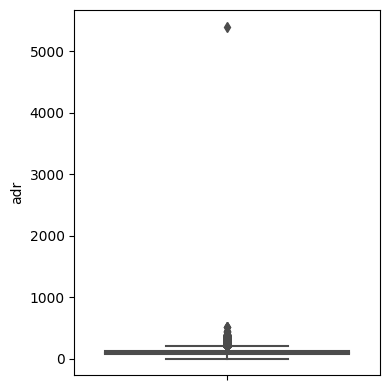

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(y=data['adr'], color='b', orient='v')
plt.tight_layout()
plt.show()

In [27]:
data.drop(data[data['adr'] == 5400.0].index, inplace=True)

8. Delete row data with 0 in adults column, because most of hotels won't permit anybody younger than 18 to stay in a room unaccompanied.

In [28]:
data[data['adults'] == 0].shape

(448, 28)

In [29]:
data.drop(data[data['adults'] == 0].index, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141497 entries, 0 to 141946
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141497 non-null  object 
 1   is_canceled                     141497 non-null  int64  
 2   lead_time                       141497 non-null  int64  
 3   arrival_date_year               141497 non-null  int64  
 4   arrival_date_month              141497 non-null  object 
 5   arrival_date_week_number        141497 non-null  int64  
 6   arrival_date_day_of_month       141497 non-null  int64  
 7   stays_in_weekend_nights         141497 non-null  int64  
 8   stays_in_week_nights            141497 non-null  int64  
 9   adults                          141497 non-null  int64  
 10  children                        141497 non-null  int32  
 11  babies                          141497 non-null  int64  
 12  meal            

In [31]:
data.to_csv('./data/hotel_revenue_edited.csv', index=False)

In [32]:
df = pd.read_csv('./data/hotel_revenue_edited.csv')
df.shape

(141497, 28)